In [1]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 4.1 MB/s eta 0:00:00


In [24]:
import optuna
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from tensorflow import keras
from tensorflow.keras.layers import Dense, Convolution2D, Activation, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [26]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    model = Sequential()
    model.add(Dense(units=trial.suggest_int('units', 32, 128), activation='relu', input_dim=4))
    model.add(Dropout(trial.suggest_float('dropout', 0.0, 0.5)))
    model.add(Dense(units=3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=5, batch_size=trial.suggest_categorical('batch_size', [16, 32, 64]), verbose=0)

    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]

study = optuna.create_study()

study.optimize(objective, n_trials=50)
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)


[I 2024-03-13 21:33:10,999] A new study created in memory with name: no-name-c0f8c329-4c24-4fda-b89f-cc8cca3b7ed0
[I 2024-03-13 21:33:14,452] Trial 0 finished with value: 0.36666667461395264 and parameters: {'units': 94, 'dropout': 0.4596936176220378, 'batch_size': 64}. Best is trial 0 with value: 0.36666667461395264.
[I 2024-03-13 21:33:15,589] Trial 1 finished with value: 0.46666666865348816 and parameters: {'units': 106, 'dropout': 0.4230144696653521, 'batch_size': 64}. Best is trial 0 with value: 0.36666667461395264.
[I 2024-03-13 21:33:16,943] Trial 2 finished with value: 0.30000001192092896 and parameters: {'units': 36, 'dropout': 0.37033376459202016, 'batch_size': 64}. Best is trial 2 with value: 0.30000001192092896.
[I 2024-03-13 21:33:18,258] Trial 3 finished with value: 0.30000001192092896 and parameters: {'units': 58, 'dropout': 0.19666025313295166, 'batch_size': 64}. Best is trial 2 with value: 0.30000001192092896.
[I 2024-03-13 21:33:20,037] Trial 4 finished with value: 1.

Mejores hiperparámetros: {'units': 64, 'dropout': 0.15079157505241314, 'batch_size': 64}


In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
val_losses = []

def objective(trial):
    model = Sequential([Convolution2D(filters=32,
                                  kernel_size=(3, 3),
                                  input_shape=(28, 28, 1)),
                    Activation('relu'),
                    Convolution2D(filters=32,
                                  kernel_size=(3, 3)),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dense(64),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax')])

    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    momentum = trial.suggest_float("momentum", 0.0, 1.0)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=batch_size)

    val_loss = history.history['val_loss'][-1]
    val_losses.append(val_loss)

    return val_losses

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2)

best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

[I 2024-03-13 20:44:52,516] A new study created in memory with name: no-name-4afdebc0-f6eb-40e8-8d47-999137bf2a3b


Epoch 1/2
938/938 [==============================] - 7s 6ms/step - loss: 2.2971 - accuracy: 0.0913 - val_loss: 2.2912 - val_accuracy: 0.0981
Epoch 2/2
938/938 [==============================] - 4s 5ms/step - loss: 2.2858 - accuracy: 0.1173 - val_loss: 2.2796 - val_accuracy: 0.1327


[I 2024-03-13 20:45:04,797] Trial 0 finished with value: 2.2796459197998047 and parameters: {'lr': 3.504700955968694e-05, 'momentum': 0.12911840278048614, 'batch_size': 64}. Best is trial 0 with value: 2.2796459197998047.


Epoch 1/2
938/938 [==============================] - 7s 6ms/step - loss: 0.7587 - accuracy: 0.7786 - val_loss: 0.2411 - val_accuracy: 0.9283
Epoch 2/2
938/938 [==============================] - 4s 5ms/step - loss: 0.2103 - accuracy: 0.9375 - val_loss: 0.1634 - val_accuracy: 0.9516


[W 2024-03-13 20:45:16,321] Trial 1 failed with parameters: {'lr': 0.00017778579835487496, 'momentum': 0.9911190069163726, 'batch_size': 64} because of the following error: The number of the values 2 did not match the number of the objectives 1.
[W 2024-03-13 20:45:16,323] Trial 1 failed with value [2.2796459197998047, 0.16340529918670654].


Mejores hiperparámetros: {'lr': 3.504700955968694e-05, 'momentum': 0.12911840278048614, 'batch_size': 64}


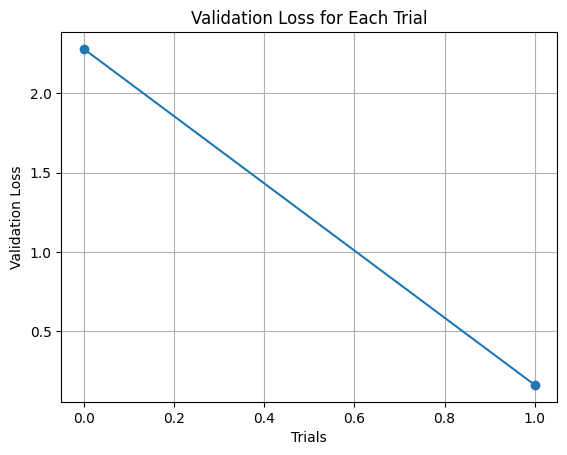

In [11]:
plt.plot(val_losses, marker='o')
plt.title('Validation Loss for Each Trial')
plt.xlabel('Trials')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.show()


In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
def objective(trial):

    num_layers = trial.suggest_int('num_layers', 1, 5)

    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    for i in range(num_layers):
        num_units = trial.suggest_int(f'num_units_layer_{i}', 32, 512)
        model.add(Dense(num_units, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=3, verbose=0, validation_split=0.2)

    score = model.evaluate(x_test, y_test, verbose=0)
    return 1.0 - score[1]


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)


print("Mejores parámetros:")
best_trial = study.best_trial
print(f"Profundidad óptima: {best_trial.params['num_layers']}")
for i in range(best_trial.params['num_layers']):
    print(f"Unidades en la capa {i+1}: {best_trial.params[f'num_units_layer_{i}']}")
print(f"Pérdida mínima en el conjunto de prueba: {best_trial.value}")

[I 2024-03-13 20:47:32,676] A new study created in memory with name: no-name-82363613-4c28-478c-81c4-19a04461fb7b
[I 2024-03-13 20:47:51,265] Trial 0 finished with value: 0.027800023555755615 and parameters: {'num_layers': 4, 'num_units_layer_0': 127, 'num_units_layer_1': 402, 'num_units_layer_2': 250, 'num_units_layer_3': 419}. Best is trial 0 with value: 0.027800023555755615.
[I 2024-03-13 20:48:14,270] Trial 1 finished with value: 0.03179997205734253 and parameters: {'num_layers': 4, 'num_units_layer_0': 189, 'num_units_layer_1': 461, 'num_units_layer_2': 250, 'num_units_layer_3': 332}. Best is trial 0 with value: 0.027800023555755615.
[I 2024-03-13 20:48:31,605] Trial 2 finished with value: 0.03020000457763672 and parameters: {'num_layers': 4, 'num_units_layer_0': 177, 'num_units_layer_1': 448, 'num_units_layer_2': 133, 'num_units_layer_3': 478}. Best is trial 0 with value: 0.027800023555755615.
[I 2024-03-13 20:48:48,270] Trial 3 finished with value: 0.02890002727508545 and parame

Mejores parámetros:
Profundidad óptima: 1
Unidades en la capa 1: 167
Pérdida mínima en el conjunto de prueba: 0.025300025939941406


In [22]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

def objective(trial):

    model = keras.Sequential()
    num_conv_layers = trial.suggest_int('num_conv_layers', 1, 3)

    for i in range(num_conv_layers):
        num_filters = trial.suggest_int(f'num_filters_layer_{i}', 16, 32)
        kernel_size = trial.suggest_int(f'kernel_size_layer_{i}', 3, 5)
        model.add(Convolution2D(num_filters, kernel_size=kernel_size, activation='relu', input_shape=(28, 28, 1)))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    num_fc_layers = trial.suggest_int('num_fc_layers', 1, 2)
    for i in range(num_fc_layers):
        num_units = trial.suggest_int(f'num_units_layer_{i}', 32, 512)
        model.add(Dense(num_units, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=3, verbose=0, validation_split=0.2)

    score = model.evaluate(x_test, y_test, verbose=0)
    return 1.0 - score[1]

# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)  # Puedes ajustar el número de ensayos

# Imprimir los resultados
print("Mejores parámetros:")
best_trial = study.best_trial
print(f"Profundidad óptima (capas convolucionales): {best_trial.params['num_conv_layers']}")
for i in range(best_trial.params['num_conv_layers']):
    print(f"Capa {i+1}:")
    print(f"Número de filtros: {best_trial.params[f'num_filters_layer_{i}']}")
    print(f"Tamaño del kernel: {best_trial.params[f'kernel_size_layer_{i}']}")
print(f"Profundidad óptima (capas completamente conectadas): {best_trial.params['num_fc_layers']}")
for i in range(best_trial.params['num_fc_layers']):
    print(f"Capa {i+1}:")
    print(f"Número de unidades: {best_trial.params[f'num_units_layer_{i}']}")
print(f"Pérdida mínima en el conjunto de prueba: {best_trial.value}")


[I 2024-03-13 21:25:08,404] A new study created in memory with name: no-name-9610e47f-98f6-4063-9cd5-7d6720831ff9
[I 2024-03-13 21:25:31,513] Trial 0 finished with value: 0.014500021934509277 and parameters: {'num_conv_layers': 3, 'num_filters_layer_0': 23, 'kernel_size_layer_0': 5, 'num_filters_layer_1': 16, 'kernel_size_layer_1': 5, 'num_filters_layer_2': 19, 'kernel_size_layer_2': 3, 'num_fc_layers': 2, 'num_units_layer_0': 61, 'num_units_layer_1': 409}. Best is trial 0 with value: 0.014500021934509277.
[I 2024-03-13 21:25:54,063] Trial 1 finished with value: 0.013000011444091797 and parameters: {'num_conv_layers': 2, 'num_filters_layer_0': 21, 'kernel_size_layer_0': 4, 'num_filters_layer_1': 19, 'kernel_size_layer_1': 5, 'num_fc_layers': 1, 'num_units_layer_0': 346}. Best is trial 1 with value: 0.013000011444091797.
[I 2024-03-13 21:26:12,733] Trial 2 finished with value: 0.011200010776519775 and parameters: {'num_conv_layers': 2, 'num_filters_layer_0': 16, 'kernel_size_layer_0': 5

Mejores parámetros:
Profundidad óptima (capas convolucionales): 2
Capa 1:
Número de filtros: 16
Tamaño del kernel: 5
Capa 2:
Número de filtros: 30
Tamaño del kernel: 5
Profundidad óptima (capas completamente conectadas): 1
Capa 1:
Número de unidades: 341
Pérdida mínima en el conjunto de prueba: 0.011200010776519775
